In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from scipy import interpolate
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
from scipy import ndimage
import matplotlib as mpl
import numpy as np
import os
import pandas as pd
import warnings
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import seaborn as sns
import missingno as msno
import copy
import datetime as dt
from matplotlib.font_manager import FontProperties
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


In [4]:
df1=pd.read_csv('combine_conghua_5_8.csv',index_col=0, parse_dates=True)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78 entries, 2018-01-01 to 2018-03-31
Data columns (total 92 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   总死亡人数               78 non-null     int64  
 1   女性死亡人数              78 non-null     float64
 2   男性死亡人数              77 non-null     float64
 3   0-5岁死亡人数            78 non-null     float64
 4   5-10岁死亡人数           78 non-null     float64
 5   10-15岁死亡人数          78 non-null     int64  
 6   15-20岁死亡人数          78 non-null     float64
 7   20-25岁死亡人数          78 non-null     float64
 8   25-30岁死亡人数          78 non-null     float64
 9   30-35岁死亡人数          78 non-null     float64
 10  35-40岁死亡人数          78 non-null     float64
 11  40-45岁死亡人数          78 non-null     float64
 12  45-50岁死亡人数          78 non-null     float64
 13  50-55岁死亡人数          78 non-null     float64
 14  55-60岁死亡人数          78 non-null     float64
 15  60-65岁死亡人数          78 non-null     flo

In [56]:
# 导入数据
df=pd.read_csv('yuexiu_emergency_data_4_29.csv',index_col=0, parse_dates=True)

# 设置索引方便做时序图,跑模型的时候注释掉，否则会报错
# df['日期']=pd.to_datetime(df['日期'])
# df=df.set_index('日期')

df.shape

(90, 55)

In [21]:
print('特征的Shape',x.shape)
print('预测值Shape',y.shape)
print('特征名称:\n',x.columns)
print('预测名称:\n',y.columns)


特征的Shape (90, 18)
预测值Shape (90, 37)
特征名称:
 Index(['血液系统急症急救人数', 'SO2', 'NO2', 'PM10', 'PM2.5', 'CO', '臭氧日最大8小时均值',
       '臭氧日最大1小时', '平均气压(hpa)', '最高气压(hpa)', '平均温度(℃)', '最高温度(℃)', '最低温度(℃)',
       '平均相对湿度(%)', '最大湿度(%)', '最小湿度(%)', '降水量(mm)', '日平均风速(m/s)'],
      dtype='object')
预测名称:
 Index(['男性急救人数', '女性急救人数', '未知性别急救人数', '未知年龄急救人数', '0-5岁急救人数', '5-10岁急救人数',
       '10-15岁急救人数', '15-20岁急救人数', '20-25岁急救人数', '25-30岁急救人数', '30-35岁急救人数',
       '35-40岁急救人数', '40-45岁急救人数', '45-50岁急救人数', '50-55岁急救人数', '55-60岁急救人数',
       '60-65岁急救人数', '65-70岁急救人数', '70-75岁急救人数', '75-80岁急救人数', '80-85岁急救人数',
       '85岁以上急救人数', '创伤类急救人数', '常见急性中毒急救人数', '循环系统急症急救人数', '神经系统急症急救人数',
       '消化系统急症急救人数', '儿科急症急救人数', '内外科其他急症急救人数', '其他急救人数', '呼吸系统急症急救人数',
       '妇产科急症急救人数', '未知急救人数', '泌尿内分泌系统急症急救人数', '五官科急症急救人数', '血液系统急症急救人数',
       'SO2'],
      dtype='object')


# 时序图可视化

Text(0.5, 1.0, 'PM2.5变化')

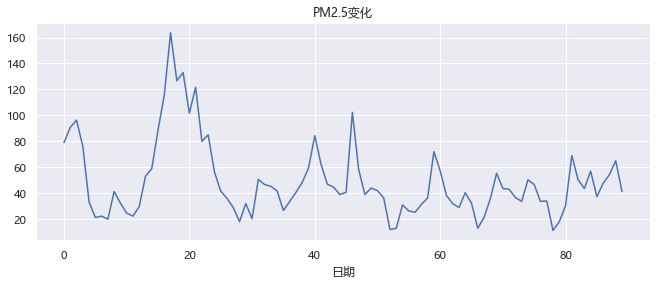

In [17]:
from pylab import mpl
sns.set(rc={'figure.figsize':(11, 4)})
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False 
df['PM2.5'].plot()
plt.xlabel('日期')
plt.title('PM2.5变化')

In [22]:
# x=x.set_index('日期')

In [ ]:
# sns.set(rc={'figure.figsize':(11, 12)})
axes = x.iloc[:,1:].plot(marker='.', alpha=0.5, linestyle='-', figsize=(12, 50), subplots=True)
for ax in axes:
#     ax.set_ylabel('浓度(ug/m3)')
    ax.set_xlabel('时间')
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False 

In [ ]:
# sns.set(rc={'figure.figsize':(11, 12)})
axes = y.plot(marker='.', alpha=0.5, linestyle='-', figsize=(12, 70), subplots=True)
for ax in axes:
#     ax.set_ylabel('浓度(ug/m3)')
    ax.set_xlabel('时间')
mpl.rcParams['font.sans-serif'] = ['Microsoft YaHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False 

#  呼吸系统急症急救人数预测

In [57]:
# 删除日期，为了代入模型
# df = df.drop(['日期'], axis = 1)
df.info()

# df.drop(['Unnamed: 0'],axis=1)
# 提取除了特征x
# df1=df.日期
x=df.iloc[:,37:]
# x=pd.concat([df1,df2], axis=1)

# 提取除了特征y
y=df.iloc[:,2:39]

# y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 0 to 89
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   日期             90 non-null     object 
 1   总急救人数          90 non-null     int64  
 2   男性急救人数         90 non-null     int64  
 3   女性急救人数         90 non-null     int64  
 4   未知性别急救人数       90 non-null     int64  
 5   未知年龄急救人数       90 non-null     int64  
 6   0-5岁急救人数       90 non-null     int64  
 7   5-10岁急救人数      90 non-null     int64  
 8   10-15岁急救人数     90 non-null     int64  
 9   15-20岁急救人数     90 non-null     int64  
 10  20-25岁急救人数     90 non-null     int64  
 11  25-30岁急救人数     90 non-null     int64  
 12  30-35岁急救人数     90 non-null     int64  
 13  35-40岁急救人数     90 non-null     int64  
 14  40-45岁急救人数     90 non-null     int64  
 15  45-50岁急救人数     90 non-null     int64  
 16  50-55岁急救人数     90 non-null     int64  
 17  55-60岁急救人数     90 non-null     int64  
 18  60-65岁急救人数  

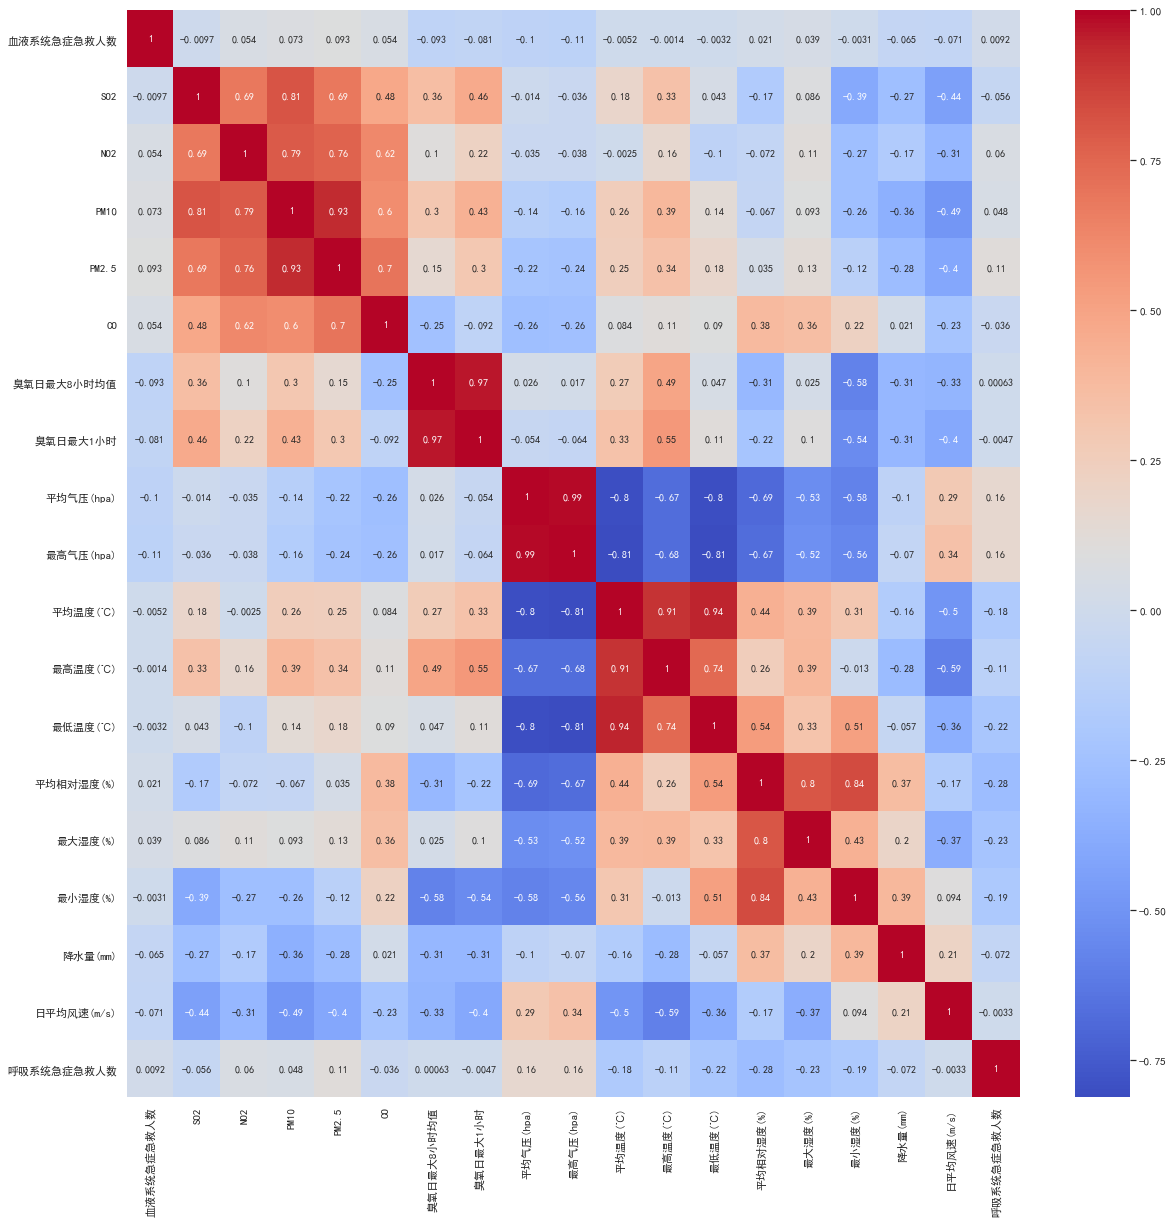

In [24]:
# 可视化相关系数
df1=pd.concat([x,y['呼吸系统急症急救人数']], axis=1)

plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),cmap='coolwarm',annot=True)
#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
# darker = stronger

In [25]:
df1.corr()

,血液系统急症急救人数,SO2,NO2,PM10,PM2.5,CO,臭氧日最大8小时均值,臭氧日最大1小时,平均气压(hpa),最高气压(hpa),平均温度(℃),最高温度(℃),最低温度(℃),平均相对湿度(%),最大湿度(%),最小湿度(%),降水量(mm),日平均风速(m/s),呼吸系统急症急救人数
血液系统急症急救人数,1.000000,-0.009726,0.053995,0.072824,0.092733,0.053622,-0.092863,-0.080620,-0.103121,-0.106110,-0.005201,-0.001417,-0.003151,0.021074,0.038790,-0.003128,-0.064959,-0.070738,0.009244
SO2,-0.009726,1.000000,0.687815,0.810353,0.685555,0.478246,0.357719,0.464800,-0.014247,-0.036384,0.184798,0.334828,0.042754,-0.170498,0.086228,-0.393543,-0.266554,-0.440604,-0.056485
NO2,0.053995,0.687815,1.000000,0.791471,0.764298,0.619765,0.102195,0.220556,-0.034795,-0.038162,-0.002465,0.163292,-0.103885,-0.072346,0.108441,-0.265280,-0.174390,-0.310763,0.060430
PM10,0.072824,0.810353,0.791471,1.000000,0.929906,0.601727,0.302324,0.432577,-0.138670,-0.155390,0.256552,0.394995,0.136261,-0.067471,0.093483,-0.263113,-0.356828,-0.491683,0.048326
PM2.5,0.092733,0.685555,0.764298,0.929906,1.000000,0.699722,0.151919,0.296022,-0.221500,-0.235355,0.247001,0.338363,0.175040,0.034811,0.125980,-0.121500,-0.276004,-0.404319,0.109602
CO,0.053622,0.478246,0.619765,0.601727,0.699722,1.000000,-0.252873,-0.092001,-0.261837,-0.257721,0.083999,0.109987,0.089819,0.382508,0.358739,0.224472,0.021075,-0.226280,-0.036338
臭氧日最大8小时均值,-0.092863,0.357719,0.102195,0.302324,0.151919,-0.252873,1.000000,0.967936,0.026477,0.016808,0.270250,0.490614,0.047350,-0.308408,0.025306,-0.582818,-0.313355,-0.325944,0.000631
臭氧日最大1小时,-0.080620,0.464800,0.220556,0.432577,0.296022,-0.092001,0.967936,1.000000,-0.053699,-0.064204,0.327850,0.547207,0.112402,-0.224424,0.100448,-0.540724,-0.311951,-0.397840,-0.004708
平均气压(hpa),-0.103121,-0.014247,-0.034795,-0.138670,-0.221500,-0.261837,0.026477,-0.053699,1.000000,0.990512,-0.801484,-0.671866,-0.804887,-0.691748,-0.529929,-0.584620,-0.101345,0.290087,0.159108
最高气压(hpa),-0.106110,-0.036384,-0.038162,-0.155390,-0.235355,-0.257721,0.016808,-0.064204,0.990512,1.000000,-0.806929,-0.677007,-0.812436,-0.671459,-0.521225,-0.564212,-0.069779,0.336279,0.163708


# 训练集，测试集

In [184]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test =train_test_split(x,y['呼吸系统急症急救人数'],test_size=0.1, random_state=0)

In [185]:
X_train.columns

Index(['血液系统急症急救人数', 'SO2', 'NO2', 'PM10', 'PM2.5', 'CO', '臭氧日最大8小时均值',
       '臭氧日最大1小时', '平均气压(hpa)', '最高气压(hpa)', '平均温度(℃)', '最高温度(℃)', '最低温度(℃)',
       '平均相对湿度(%)', '最大湿度(%)', '最小湿度(%)', '降水量(mm)', '日平均风速(m/s)'],
      dtype='object')

# LightGBM

In [159]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

        column  importance
10     平均温度(℃)          37
8    平均气压(hpa)          35
4        PM2.5          35
6   臭氧日最大8小时均值          34
7     臭氧日最大1小时          33
5           CO          30
3         PM10          28
2          NO2          27
14     最大湿度(%)          26
12     最低温度(℃)          25
9    最高气压(hpa)          25
1          SO2          24
17  日平均风速(m/s)          24
13   平均相对湿度(%)          22
11     最高温度(℃)          15
15     最小湿度(%)          14
16     降水量(mm)           0
0   血液系统急症急救人数           0


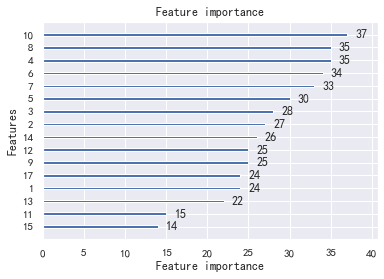

In [165]:
X_clo=list(range(len(X_train.columns)))
X_train.columns=X_clo
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=15,
                              learning_rate=0.1, n_estimators=172, max_depth=9, 
                              metric='rmse', bagging_fraction = 0.01, feature_fraction = 0.2,
                              min_child_samples=18, min_child_weight=0.001)
model_lgb.fit(X_train, y_train)


feature_name = np.array(['血液系统急症急救人数', 'SO2', 'NO2', 'PM10', 'PM2.5', 'CO', '臭氧日最大8小时均值',
       '臭氧日最大1小时', '平均气压(hpa)', '最高气压(hpa)', '平均温度(℃)', '最高温度(℃)', '最低温度(℃)',
       '平均相对湿度(%)', '最大湿度(%)', '最小湿度(%)', '降水量(mm)', '日平均风速(m/s)'])
fea_imp_lgb = pd.DataFrame({
        'column': feature_name,
        'importance': model_lgb.feature_importances_ ,
    }).sort_values(by='importance')[::-1]
print(fea_imp_lgb)
plt.rcParams['figure.facecolor'] = 'w'
lgb.plot_importance(model_lgb)

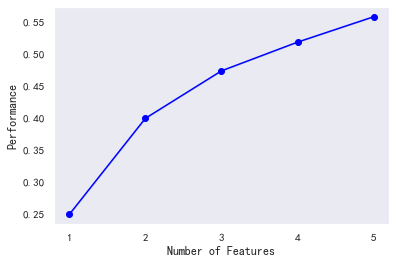

Deleted features:
        column  importance
0   血液系统急症急救人数           0
1          SO2          24
3         PM10          28
4        PM2.5          35
5           CO          30
9    最高气压(hpa)          25
10     平均温度(℃)          37
11     最高温度(℃)          15
13   平均相对湿度(%)          22
14     最大湿度(%)          26
15     最小湿度(%)          14
16     降水量(mm)           0
17  日平均风速(m/s)          24

Keeped features:
        column  importance
2          NO2          27
6   臭氧日最大8小时均值          34
7     臭氧日最大1小时          33
8    平均气压(hpa)          35
12     最低温度(℃)          25


In [166]:
get_sfs_feature_importance(lgb.LGBMRegressor(objective='regression',num_leaves=15,
                              learning_rate=0.1, n_estimators=172, max_depth=9, 
                              metric='rmse', bagging_fraction = 0.01, feature_fraction = 0.2,
                              min_child_samples=18, min_child_weight=0.001), fea_imp_lgb,X_train)

In [119]:
# 特征筛选可视化
def get_sfs_feature_importance(model, feature_importance, X_t, k_features=5):
    sfs = SFS(model, k_features=k_features, forward=True, floating=False, scoring='r2', cv=0)
    sfs.fit(X_t, y_train)
    fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
    plt.grid()
    plt.show()
    print("Deleted features:")
    print(feature_importance.loc[list(set(feature_importance.index).difference(set(sfs.k_feature_names_)))])
    print("\nKeeped features:")
    print(feature_importance.loc[list(sfs.k_feature_names_)])

# XGBoost

        column  importance
11     最高温度(℃)    0.132000
10     平均温度(℃)    0.124689
13   平均相对湿度(%)    0.109836
15     最小湿度(%)    0.088413
4        PM2.5    0.074162
12     最低温度(℃)    0.059896
6   臭氧日最大8小时均值    0.052458
14     最大湿度(%)    0.049187
8    平均气压(hpa)    0.048382
5           CO    0.046358
3         PM10    0.043783
7     臭氧日最大1小时    0.040598
17  日平均风速(m/s)    0.032709
9    最高气压(hpa)    0.028474
2          NO2    0.024053
0   血液系统急症急救人数    0.018369
1          SO2    0.015036
16     降水量(mm)    0.011600


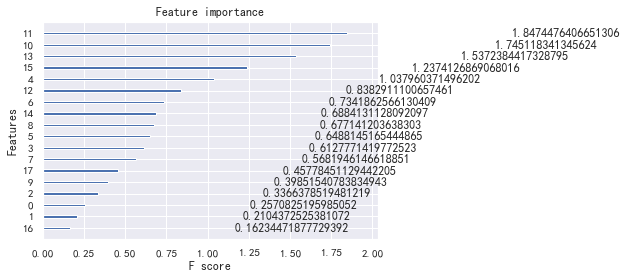

In [168]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
model_xgb = xgb.XGBRegressor(max_depth=10,
            learning_rate=0.1,
            n_estimators=1000,
            silent=True,
            objective='reg:squarederror',
            n_jobs=12,
            gamma=0,
            min_child_weight=1,
            max_delta_step=0,
            subsample=0.85,
            colsample_bytree=0.7,
            colsample_bylevel=1,
            reg_alpha=0,
            reg_lambda=1,
            scale_pos_weight=1,
            missing=None)
model_xgb.fit(X_train, y_train)

fea_imp_xgb = pd.DataFrame({
        'column': feature_name,
        'importance': model_xgb.feature_importances_ ,
    }).sort_values(by='importance')[::-1]
print(fea_imp_xgb)
xgb.plot_importance(model_xgb,importance_type='gain')

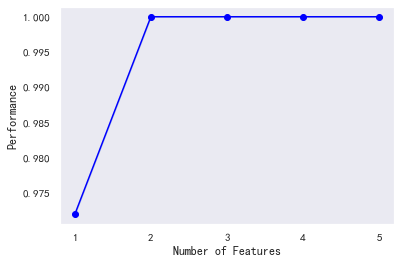

Deleted features:
        column  importance
0   血液系统急症急救人数    0.006074
1          SO2    0.029240
2          NO2    0.015671
5           CO    0.018852
6   臭氧日最大8小时均值    0.052496
8    平均气压(hpa)    0.046676
9    最高气压(hpa)    0.023925
11     最高温度(℃)    0.054510
13   平均相对湿度(%)    0.084661
14     最大湿度(%)    0.067583
15     最小湿度(%)    0.098680
16     降水量(mm)    0.183931
17  日平均风速(m/s)    0.090267

Keeped features:
      column  importance
3       PM10    0.032147
4      PM2.5    0.065062
7   臭氧日最大1小时    0.037982
10   平均温度(℃)    0.057924
12   最低温度(℃)    0.034320


In [33]:
get_sfs_feature_importance(xgb.XGBRegressor(max_depth=10,
            learning_rate=0.1,
            n_estimators=1000,
            silent=True,
            objective='reg:squarederror',
            n_jobs=12,
            gamma=0,
            min_child_weight=1,
            max_delta_step=0,
            subsample=0.85,
            colsample_bytree=0.7,
            colsample_bylevel=1,
            reg_alpha=0,
            reg_lambda=1,
            scale_pos_weight=1,
            missing=None), fea_imp_xgb,X_train)

# Catboost

In [169]:
import catboost as cb
model_cb = cb.CatBoostRegressor(iterations=1000, depth=10, learning_rate=0.1, loss_function='RMSE',
                               silent=True)
model_cb.fit(X_train , y_train)
fea_imp_cb = pd.DataFrame({
        'column': feature_name,
        'importance': model_cb.feature_importances_ ,
    }).sort_values(by='importance')[::-1]
print(fea_imp_cb)
#cb.plot_importance(model_cb)

        column  importance
4        PM2.5    8.449255
8    平均气压(hpa)    8.155457
11     最高温度(℃)    8.107105
13   平均相对湿度(%)    7.367239
10     平均温度(℃)    7.135997
15     最小湿度(%)    6.654480
12     最低温度(℃)    6.590379
6   臭氧日最大8小时均值    6.358596
3         PM10    6.283863
7     臭氧日最大1小时    5.740426
17  日平均风速(m/s)    5.549767
2          NO2    5.274911
5           CO    4.794339
9    最高气压(hpa)    4.260093
14     最大湿度(%)    3.557644
1          SO2    3.469943
16     降水量(mm)    1.532009
0   血液系统急症急救人数    0.718498


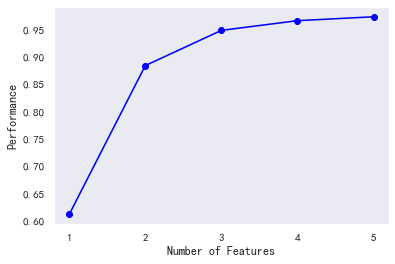

Deleted features:
        column  importance
0   血液系统急症急救人数    0.718498
3         PM10    6.283863
4        PM2.5    8.449255
5           CO    4.794339
6   臭氧日最大8小时均值    6.358596
7     臭氧日最大1小时    5.740426
9    最高气压(hpa)    4.260093
10     平均温度(℃)    7.135997
11     最高温度(℃)    8.107105
12     最低温度(℃)    6.590379
13   平均相对湿度(%)    7.367239
14     最大湿度(%)    3.557644
16     降水量(mm)    1.532009

Keeped features:
        column  importance
1          SO2    3.469943
2          NO2    5.274911
8    平均气压(hpa)    8.155457
15     最小湿度(%)    6.654480
17  日平均风速(m/s)    5.549767


In [171]:
get_sfs_feature_importance(cb.CatBoostRegressor(iterations=100,
                            depth=10, learning_rate=0.1, loss_function='RMSE',
                               silent=True), fea_imp_cb, X_train)

# Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor
model_rdf = RandomForestRegressor()
model_rdf.fit(X_train, y_train)

fea_imp_rdf = pd.DataFrame({
        'column': feature_name,
        'importance': model_rdf.feature_importances_ ,
    }).sort_values(by='importance')[::-1]
print(fea_imp_rdf)
#RandomForestRegressor.plot_importance(clf)

        column  importance
13   平均相对湿度(%)    0.133581
4        PM2.5    0.128624
1          SO2    0.086006
15     最小湿度(%)    0.080083
6   臭氧日最大8小时均值    0.067996
5           CO    0.054683
2          NO2    0.053711
10     平均温度(℃)    0.053211
12     最低温度(℃)    0.051671
7     臭氧日最大1小时    0.044232
8    平均气压(hpa)    0.042549
11     最高温度(℃)    0.041656
3         PM10    0.036916
17  日平均风速(m/s)    0.035298
14     最大湿度(%)    0.035097
9    最高气压(hpa)    0.031714
16     降水量(mm)    0.018715
0   血液系统急症急救人数    0.004257


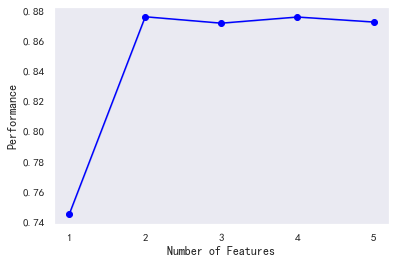

Deleted features:
        column  importance
0   血液系统急症急救人数    0.002289
1          SO2    0.075811
2          NO2    0.041847
3         PM10    0.048329
4        PM2.5    0.118844
5           CO    0.061044
6   臭氧日最大8小时均值    0.051381
8    平均气压(hpa)    0.046989
9    最高气压(hpa)    0.038593
10     平均温度(℃)    0.048491
12     最低温度(℃)    0.052561
16     降水量(mm)    0.026301
17  日平均风速(m/s)    0.042670

Keeped features:
       column  importance
7    臭氧日最大1小时    0.039871
11    最高温度(℃)    0.042516
13  平均相对湿度(%)    0.165016
14    最大湿度(%)    0.028120
15    最小湿度(%)    0.069327


In [37]:
get_sfs_feature_importance(RandomForestRegressor(), fea_imp_rdf, X_train)

# normalization

In [187]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_train_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.338643,0.447160,-0.082166,0.138255,-0.313159,-0.591913,2.208660,2.466705,-0.645962,-0.610696,1.284715,1.427515,1.171250,0.510295,0.632618,-0.248077,-0.262147,-0.920524
1,-0.338643,-1.017457,-0.698538,-1.473873,-1.053740,0.565008,-1.385431,-1.432650,-0.507297,0.438455,-0.857974,-0.886170,-1.077577,1.575993,0.741876,1.805751,1.298174,2.483653
2,-0.338643,-0.724534,-0.470021,-0.359144,-0.498217,0.376672,-1.192469,-1.175752,-0.021970,-0.119604,-0.696262,-0.719585,-0.510799,0.053567,-0.569221,0.362521,-0.262147,-0.151839
3,-0.338643,0.447160,-0.040617,0.119741,-0.174278,-0.161431,0.357706,0.090878,2.081117,1.956376,-1.423968,-1.367416,-1.424957,-2.382315,-2.208093,-1.136218,-0.262147,1.605156
4,-0.338643,-0.724534,-0.733231,-0.847425,-0.741259,-0.322862,-1.130925,-1.128995,-1.454842,-1.391979,1.688997,1.316458,1.939142,0.814780,0.523360,0.640065,-0.262147,-0.481276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-0.338643,-0.627869,-0.733231,-0.359144,-0.093033,-0.860964,2.941176,2.309099,-0.853960,-0.900887,1.001719,1.205401,0.622755,0.129688,0.523360,-0.470112,-0.262147,-0.920524
77,-0.338643,-0.821198,-0.456102,-0.801278,-1.007563,-0.780249,0.573573,0.248484,1.341570,1.353672,-0.898402,-0.164300,-1.370107,-0.631525,0.523360,-1.191727,-0.262147,0.067785
78,-0.338643,-0.528275,-0.352231,-0.294759,-0.347879,0.107621,-1.084651,-1.012367,-0.576630,-0.454439,1.001719,0.502041,1.317515,0.738659,0.523360,1.417189,-0.221443,-0.371463
79,-0.338643,-1.114122,-0.656989,-0.092207,0.277084,-0.322862,0.002785,-0.171800,-0.530408,-0.610696,0.334655,0.372475,0.366791,0.662537,0.632618,0.307012,-0.262147,0.067785


In [174]:
X_test_scaled = pd.DataFrame(scaler.transform(copy.deepcopy(X_test)))
X_test_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.338643,2.497625,0.180836,1.750107,1.596451,2.098601,0.635349,1.415997,0.093585,-0.007992,0.678294,0.816702,0.695888,0.053567,-0.022931,-0.470112,-0.262147,-0.920524
1,2.404363,1.522189,0.492450,0.469855,0.092026,0.215241,-0.436817,-0.323452,1.272238,1.152771,-0.857974,-0.460452,-0.858179,-0.250918,0.523360,-1.136218,-0.262147,-0.920524
2,-0.338643,-1.506639,-0.705393,-1.464477,-1.296782,-0.053810,-0.907191,-0.965610,0.602023,0.438455,-0.797332,-1.034246,-0.620498,0.890901,0.632618,0.917609,-0.167171,-0.481276
3,-0.338643,-0.627869,-0.449247,0.193522,0.415965,-0.591913,0.303565,0.079320,1.156684,1.331350,-0.514335,-0.682566,-0.218269,-1.392738,-2.098835,-0.636639,-0.262147,2.154216
4,-0.338643,-1.407045,-0.767716,-1.602644,-1.296782,-0.430482,-0.937963,-0.977343,0.555802,0.684001,-0.918616,-0.627037,-0.474233,0.967022,0.523360,0.973118,2.546432,2.593465
5,-0.338643,-1.407045,-0.193100,-1.363339,-1.042283,0.376672,-0.937963,-0.913075,1.110462,1.108126,-2.131460,-2.440966,-1.424957,0.890901,0.632618,0.917609,0.389117,2.373841
6,-0.338643,-0.821198,-0.227586,0.073593,-0.336074,-0.430482,0.766304,0.604674,-0.414854,-0.432117,0.334655,0.576079,0.074261,0.510295,0.523360,0.195994,-0.262147,-1.140149
7,-0.338643,-0.821198,-0.137633,0.377560,-0.197193,-1.049300,0.920627,0.756327,1.434014,1.420639,-0.797332,0.002285,-1.351824,-1.316617,-0.132189,-1.746816,-0.262147,-0.591088
8,-0.338643,-0.821198,-0.767716,-1.482992,-1.354764,-0.511198,0.133971,-0.025751,-0.900182,-0.655341,0.274013,0.039304,0.311942,0.205809,0.632618,-0.081550,2.180095,3.252338


# Linear Regression

In [175]:
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
fea_imp_lr = pd.DataFrame({
        'column': feature_name,
        'weight': np.abs(model_lr.coef_),
    }).sort_values(by='weight')[::-1]
print(fea_imp_lr)

        column    weight
6   臭氧日最大8小时均值  3.180329
12     最低温度(℃)  3.162395
7     臭氧日最大1小时  3.104758
4        PM2.5  3.015224
13   平均相对湿度(%)  2.557575
15     最小湿度(%)  2.541332
3         PM10  2.384016
11     最高温度(℃)  1.426581
9    最高气压(hpa)  1.118361
8    平均气压(hpa)  0.967750
17  日平均风速(m/s)  0.872145
10     平均温度(℃)  0.869983
1          SO2  0.529652
5           CO  0.480098
2          NO2  0.211046
0   血液系统急症急救人数  0.132637
14     最大湿度(%)  0.122698
16     降水量(mm)  0.053149


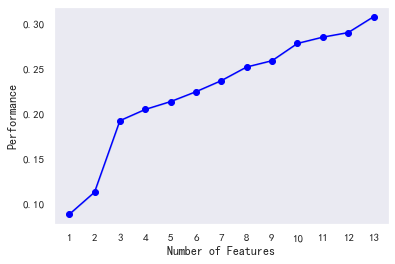

Deleted features:
       column    weight
2         NO2  0.218854
5          CO  0.420111
9   最高气压(hpa)  0.065502
10    平均温度(℃)  1.252228
14    最大湿度(%)  0.640213

Keeped features:
        column    weight
0   血液系统急症急救人数  0.208021
1          SO2  0.244306
3         PM10  2.654753
4        PM2.5  2.831005
6   臭氧日最大8小时均值  3.273421
7     臭氧日最大1小时  2.930561
8    平均气压(hpa)  0.269570
11     最高温度(℃)  2.789279
12     最低温度(℃)  2.297381
13   平均相对湿度(%)  1.894057
15     最小湿度(%)  2.106362
16     降水量(mm)  0.329702
17  日平均风速(m/s)  0.782326


In [66]:
get_sfs_feature_importance(LinearRegression(), fea_imp_lr, X_train_scaled,13)

In [177]:
from sklearn.linear_model import LinearRegression

LinReg = LinearRegression()
model_lr=LinReg.fit(X_train_scaled,y_train)
fea_imp_lr = pd.DataFrame({
        'column': feature_name,
        'weight': np.abs(model_lr.coef_),
    }).sort_values(by='weight')[::-1]
print(fea_imp_lr)
print ("R2 of Linear Regresson:", LinReg.score(X_train_scaled,y_train) )

        column    weight
6   臭氧日最大8小时均值  3.180329
12     最低温度(℃)  3.162395
7     臭氧日最大1小时  3.104758
4        PM2.5  3.015224
13   平均相对湿度(%)  2.557575
15     最小湿度(%)  2.541332
3         PM10  2.384016
11     最高温度(℃)  1.426581
9    最高气压(hpa)  1.118361
8    平均气压(hpa)  0.967750
17  日平均风速(m/s)  0.872145
10     平均温度(℃)  0.869983
1          SO2  0.529652
5           CO  0.480098
2          NO2  0.211046
0   血液系统急症急救人数  0.132637
14     最大湿度(%)  0.122698
16     降水量(mm)  0.053149
R2 of Linear Regresson: 0.2706492639704807


In [178]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print('MAE: ',metrics.mean_absolute_error(y_test, LinReg.predict(X_test)))
print('MSE: ',metrics.mean_squared_error(y_test, LinReg.predict(X_test)))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, LinReg.predict(X_test))))

MAE:  97.67296159937587
MSE:  12367.538340325384
RMSE: 111.2094345832465


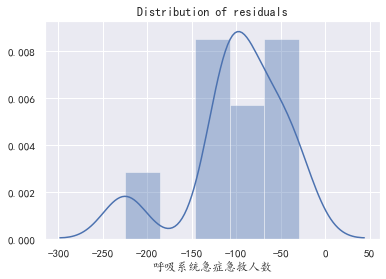

In [179]:
# Creating a Histogram of Residuals
plt.figure(figsize=(6,4))
sns.distplot(y_test - LinReg.predict(X_test))
plt.title('Distribution of residuals');

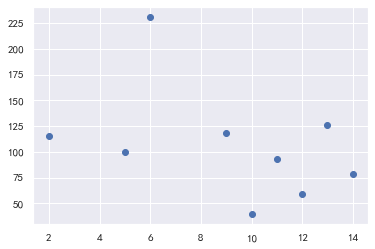

In [180]:
plt.scatter(y_test,LinReg.predict(X_test))

In [182]:
# we can confirm the R2 value (moreover, get the R2 Adj.value) of the model by statsmodels library of python
import statsmodels.api as sm
X_train = sm.add_constant(X_train) # adding a constant
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             呼吸系统急症急救人数   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     1.278
Date:                Sat, 09 May 2020   Prob (F-statistic):              0.234
Time:                        18:10:10   Log-Likelihood:                -202.55
No. Observations:                  81   AIC:                             443.1
Df Residuals:                      62   BIC:                             488.6
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.1392    248.967     -0.021      0.9

# Ridge Regression (L2)

In [188]:
from sklearn.linear_model import Ridge,RidgeCV
model_rd = RidgeCV()
model_rd.fit(X_train_scaled, y_train)
fea_imp_rd = pd.DataFrame({
        'column': feature_name,
        'weight': np.abs(model_rd.coef_),
    }).sort_values(by='weight')[::-1]
print(fea_imp_rd)

        column    weight
4        PM2.5  1.099488
12     最低温度(℃)  0.749664
1          SO2  0.741668
13   平均相对湿度(%)  0.736322
17  日平均风速(m/s)  0.508127
6   臭氧日最大8小时均值  0.358383
3         PM10  0.330741
14     最大湿度(%)  0.294493
11     最高温度(℃)  0.263818
10     平均温度(℃)  0.216986
8    平均气压(hpa)  0.186016
0   血液系统急症急救人数  0.126696
7     臭氧日最大1小时  0.126675
15     最小湿度(%)  0.124419
2          NO2  0.112549
16     降水量(mm)  0.073355
9    最高气压(hpa)  0.007402
5           CO  0.003109


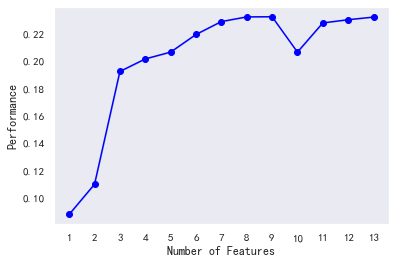

Deleted features:
     column    weight
2       NO2  0.095681
5        CO  0.110107
10  平均温度(℃)  0.273136
11  最高温度(℃)  0.265683
15  最小湿度(%)  0.274624

Keeped features:
        column    weight
0   血液系统急症急救人数  0.140215
1          SO2  0.692572
3         PM10  0.349089
4        PM2.5  0.855370
6   臭氧日最大8小时均值  0.509360
7     臭氧日最大1小时  0.020078
8    平均气压(hpa)  0.294910
9    最高气压(hpa)  0.320430
12     最低温度(℃)  0.597248
13   平均相对湿度(%)  0.720454
14     最大湿度(%)  0.397597
16     降水量(mm)  0.429174
17  日平均风速(m/s)  0.454120


In [74]:
get_sfs_feature_importance(RidgeCV(), fea_imp_rd, X_train_scaled,13)

# Lasso Regression (L1)

In [78]:
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV
model_ls = LassoCV()
model_ls.fit(X_train_scaled, y_train)
fea_imp_ls = pd.DataFrame({
        'column': feature_name,
        'weight': np.abs(model_ls.coef_),
    }).sort_values(by='weight')[::-1]
print(fea_imp_ls)

        column    weight
13   平均相对湿度(%)  0.071658
17  日平均风速(m/s)  0.000000
7     臭氧日最大1小时  0.000000
1          SO2  0.000000
2          NO2  0.000000
3         PM10  0.000000
4        PM2.5  0.000000
5           CO  0.000000
6   臭氧日最大8小时均值  0.000000
8    平均气压(hpa)  0.000000
16     降水量(mm)  0.000000
9    最高气压(hpa)  0.000000
10     平均温度(℃)  0.000000
11     最高温度(℃)  0.000000
12     最低温度(℃)  0.000000
14     最大湿度(%)  0.000000
15     最小湿度(%)  0.000000
0   血液系统急症急救人数  0.000000


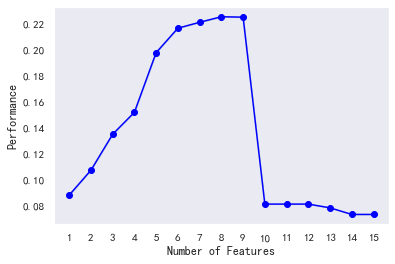

Deleted features:
     column  weight
2       NO2     0.0
3      PM10     0.0
12  最低温度(℃)     0.0

Keeped features:
        column    weight
0   血液系统急症急救人数  0.000000
1          SO2  0.000000
4        PM2.5  0.000000
5           CO  0.000000
6   臭氧日最大8小时均值  0.000000
7     臭氧日最大1小时  0.000000
8    平均气压(hpa)  0.000000
9    最高气压(hpa)  0.000000
10     平均温度(℃)  0.000000
11     最高温度(℃)  0.000000
13   平均相对湿度(%)  0.071658
14     最大湿度(%)  0.000000
15     最小湿度(%)  0.000000
16     降水量(mm)  0.000000
17  日平均风速(m/s)  0.000000


In [79]:
get_sfs_feature_importance(LassoLarsCV(), fea_imp_ls, X_train_scaled,15)

# Suport Vector Regressor

In [90]:
from sklearn.svm import SVR
model_svr = SVR(kernel="linear")
model_svr.fit(X_train_scaled, y_train)

fea_imp_svr = pd.DataFrame({
        'column': feature_name,
        'weight': np.abs(model_svr.coef_.flatten()),
    }).sort_values(by='weight')[::-1]
print(fea_imp_svr)

        column    weight
12     最低温度(℃)  0.809876
4        PM2.5  0.770102
11     最高温度(℃)  0.657282
6   臭氧日最大8小时均值  0.561553
13   平均相对湿度(%)  0.560444
1          SO2  0.489294
7     臭氧日最大1小时  0.475860
3         PM10  0.417329
15     最小湿度(%)  0.385485
14     最大湿度(%)  0.164197
10     平均温度(℃)  0.115473
8    平均气压(hpa)  0.103481
9    最高气压(hpa)  0.090302
5           CO  0.060417
17  日平均风速(m/s)  0.050380
0   血液系统急症急救人数  0.041359
16     降水量(mm)  0.036105
2          NO2  0.032223


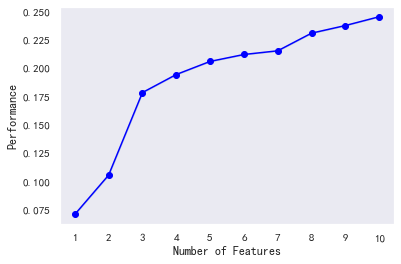

Deleted features:
        column    weight
0   血液系统急症急救人数  0.041359
1          SO2  0.489294
2          NO2  0.032223
5           CO  0.060417
9    最高气压(hpa)  0.090302
12     最低温度(℃)  0.809876
14     最大湿度(%)  0.164197
15     最小湿度(%)  0.385485

Keeped features:
        column    weight
3         PM10  0.417329
4        PM2.5  0.770102
6   臭氧日最大8小时均值  0.561553
7     臭氧日最大1小时  0.475860
8    平均气压(hpa)  0.103481
10     平均温度(℃)  0.115473
11     最高温度(℃)  0.657282
13   平均相对湿度(%)  0.560444
16     降水量(mm)  0.036105
17  日平均风速(m/s)  0.050380


In [91]:
get_sfs_feature_importance(SVR(kernel="linear"), fea_imp_svr, X_train_scaled,10)

In [93]:
# print('linear',model_svr.score(X_train,y_train))

# Svr=SVR(kernel='rbf', C=1, gamma= 0.5)   # Parameter Tuning to get the best accuracy

# # Intuitively, the gamma defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.
# # The C parameter trades off correct classification of training examples against maximization of the decision function’s margin. 
# # For larger values of C, a smaller margin will be accepted if the decision function is better at classifying all training points correctly. 
# # A lower C will encourage a larger margin, therefore a simpler decision function, at the cost of training accuracy. 
# # In other words C behaves as a regularization parameter in the SVM.

# Svr.fit(X_train,y_train)

# print('rbf',Svr.score(X_train,y_train))

#  RandomForestRegressor

In [94]:
from sklearn.ensemble import RandomForestRegressor
RForest = RandomForestRegressor()
RForest.fit(X_train,y_train)
print(RForest.score(X_train,y_train))  

0.841747781178271


In [95]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.ensemble import RandomForestClassifier

# Build RF classifier to use in feature selection
clf = RandomForestClassifier(n_estimators=100, n_jobs=-1)

# Build step forward feature selection
sfs1 = sfs(clf,
           k_features=5,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

sfs1 = sfs1.fit(X_train, y_train)
# Which features?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s finished

[2020-05-09 17:22:55] Features: 1/5 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    0.0s finished

[2020-05-09 17:22:55] Features: 2/5 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    0.0s finished

[2020-05-09 17:22:56] Features: 3/5 -- score: nan[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0

[0, 1, 2, 3, 4]


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.0s finished

[2020-05-09 17:22:56] Features: 5/5 -- score: nan

- PM2.5 
- 臭氧日最大1小时 
- 平均气压(hpa) 
- 平均相对湿度(%)

sfs1.k_feature_idx_

X_train.columns

# Neural Network

In [101]:
from sklearn.neural_network import MLPRegressor
model_mlpr = MLPRegressor()
model_mlpr.fit(X_train_scaled, y_train)
#model_mlpr.

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [148]:
models_name = ["feature", "Catboost", "LightGBM", "LinearReg", "Lasso", "Ridge", "RandomForest",
               "SVR", "xgboost", "NN"]
models = [model_cb, model_lgb, model_lr, model_ls, model_rd, model_rdf, model_svr, model_xgb, model_mlpr]
fea_imp = [fea_imp_cb, fea_imp_lgb, fea_imp_lr, fea_imp_ls, fea_imp_rd, fea_imp_rdf, fea_imp_svr, fea_imp_xgb]

In [149]:
fea_imp_lgb

,column,importance
13,平均相对湿度(%),39
14,最大湿度(%),30
15,最小湿度(%),29
11,最高温度(℃),27
2,NO2,21
6,臭氧日最大8小时均值,21
5,CO,21
4,PM2.5,19
9,最高气压(hpa),18
7,臭氧日最大1小时,17


In [150]:
print(fea_imp)

[        column  importance
15     最小湿度(%)    9.810766
4        PM2.5    9.360211
17  日平均风速(m/s)    8.250589
13   平均相对湿度(%)    7.798384
1          SO2    6.742402
7     臭氧日最大1小时    6.594977
14     最大湿度(%)    6.553057
12     最低温度(℃)    6.189379
6   臭氧日最大8小时均值    6.011658
5           CO    5.631730
3         PM10    4.796931
10     平均温度(℃)    4.393286
8    平均气压(hpa)    4.202406
16     降水量(mm)    3.341412
2          NO2    3.278300
11     最高温度(℃)    3.252863
9    最高气压(hpa)    3.124293
0   血液系统急症急救人数    0.667356,         column  importance
13   平均相对湿度(%)          39
14     最大湿度(%)          30
15     最小湿度(%)          29
11     最高温度(℃)          27
2          NO2          21
6   臭氧日最大8小时均值          21
5           CO          21
4        PM2.5          19
9    最高气压(hpa)          18
7     臭氧日最大1小时          17
10     平均温度(℃)          14
17  日平均风速(m/s)          12
3         PM10          11
12     最低温度(℃)           7
8    平均气压(hpa)           6
1          SO2           5
16     降水量(mm)           0

In [151]:
import copy
fea = copy.deepcopy(fea_imp[0])
for i in range(1, len(fea_imp)):
    fea = pd.merge(fea, fea_imp[i], on="column")
fea.columns = models_name[:-1]
fea

,feature,Catboost,LightGBM,LinearReg,Lasso,Ridge,RandomForest,SVR,xgboost
0,最小湿度(%),9.810766,29,2.106362,0.000000,0.274624,0.080083,0.385485,0.098680
1,PM2.5,9.360211,19,2.831005,0.000000,0.855370,0.128624,0.770102,0.065062
2,日平均风速(m/s),8.250589,12,0.782326,0.000000,0.454120,0.035298,0.050380,0.090267
3,平均相对湿度(%),7.798384,39,1.894057,0.071658,0.720454,0.133581,0.560444,0.084661
4,SO2,6.742402,5,0.244306,0.000000,0.692572,0.086006,0.489294,0.029240
5,臭氧日最大1小时,6.594977,17,2.930561,0.000000,0.020078,0.044232,0.475860,0.037982
6,最大湿度(%),6.553057,30,0.640213,0.000000,0.397597,0.035097,0.164197,0.067583
7,最低温度(℃),6.189379,7,2.297381,0.000000,0.597248,0.051671,0.809876,0.034320
8,臭氧日最大8小时均值,6.011658,21,3.273421,0.000000,0.509360,0.067996,0.561553,0.052496
9,CO,5.631730,21,0.420111,0.000000,0.110107,0.054683,0.060417,0.018852


In [152]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [153]:
fea_scaler = pd.DataFrame(min_max_scaler.fit_transform(fea.iloc[:,1:]))
fea_scaler

,0,1,2,3,4,5,6,7
0,1.000000,0.743590,0.636194,0.0,0.304739,0.586324,0.454268,0.520674
1,0.950724,0.487179,0.862086,0.0,1.000000,0.961671,0.948855,0.331657
2,0.829366,0.307692,0.223454,0.0,0.519629,0.240027,0.023349,0.473376
3,0.779909,1.000000,0.570013,1.0,0.838481,1.000000,0.679251,0.441855
4,0.664418,0.128205,0.055738,0.0,0.805101,0.632129,0.587757,0.130249
5,0.648294,0.435897,0.893121,0.0,0.000000,0.309110,0.570482,0.179405
6,0.643710,0.769231,0.179154,0.0,0.451961,0.238474,0.169708,0.345832
7,0.603935,0.179487,0.695741,0.0,0.690980,0.366628,1.000000,0.158812
8,0.584498,0.538462,1.000000,0.0,0.585762,0.492863,0.680677,0.261009
9,0.542946,0.538462,0.110542,0.0,0.107782,0.389923,0.036255,0.071845


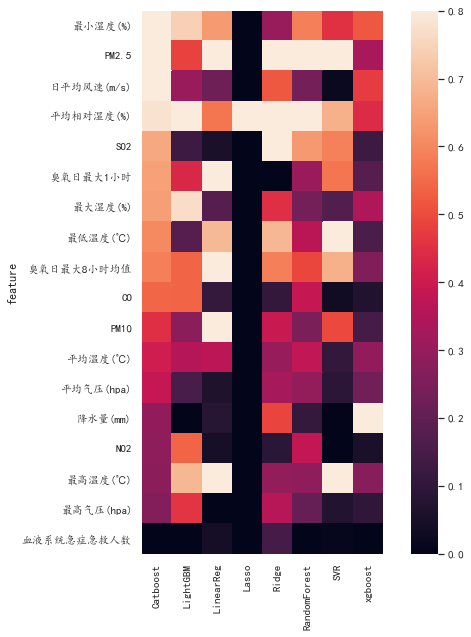

In [154]:
fea_scaler.index = fea["feature"]
plt.figure(figsize = (10,10))
fea_scaler.columns = models_name[1:-1]
sns.set(font="KaiTi")
sns.heatmap(fea_scaler,square = True,  vmax=0.8) 

In [192]:
from sklearn import metrics
loss = {"Explained variance score":[], "Mean absolute error":[], "Mean squared error":[], 
        "Median absolute error":[], "r2":[]}
loss_func = [metrics.explained_variance_score, metrics.mean_absolute_error, metrics.mean_squared_error,
            metrics.median_absolute_error, metrics.r2_score]
for model,model_name in zip(models,models_name[1:]):
    if model_name in [ "LightGBM", "RandomForest", "xgboost"]:  #"Catboost",
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_scaled)
    for lf,lsn in zip(loss_func, loss):
        loss[lsn].append(lf(y_test, y_pred))
loss = pd.DataFrame(loss)
loss.index = models_name[1:]
loss.sort_values(by='r2')

,Explained variance score,Mean absolute error,Mean squared error,Median absolute error,r2
NN,0.160594,9.697589,106.064363,10.460775,-6.406218
Lasso,0.019048,9.115556,97.141561,9.982020,-5.783161
SVR,0.080828,9.096644,95.912391,10.786818,-5.697331
LinearReg,-0.199667,3.809120,17.570648,3.356459,-0.226916
Catboost,0.018206,3.157925,14.102495,3.130013,0.015257
LightGBM,0.137759,2.888472,12.348170,2.601637,0.137757
Ridge,0.242350,2.930307,10.958644,2.650191,0.234784
xgboost,0.501141,2.733555,8.898288,2.759699,0.378654
RandomForest,0.458405,2.767778,8.826256,2.380000,0.383684
